# Новицкий Ярослав ИУ5-65Б РК1

## Вариант 12  

### Импорт библиотек

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Смотрим на датасет

In [8]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 1. Проверка наличия пропусков и их искуственное создание

In [9]:
print("Количество пропусков в каждом столбце:")
print(df.isnull().sum())

Количество пропусков в каждом столбце:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Пропусков нет => создадим 5% пропусков искусственно.

In [10]:
# Создание искусственных пропусков в количественном признаке 'chol' и категориальном признаке 'thal'
np.random.seed(42)
missing_rate = 0.05  # 5% пропусков

# Выбор случайных индексов для пропусков
missing_indices_chol = df.sample(frac=missing_rate).index
missing_indices_thal = df.sample(frac=missing_rate).index

# Введение пропусков
df.loc[missing_indices_chol, 'chol'] = np.nan
df.loc[missing_indices_thal, 'thal'] = np.nan

# Проверка наличия пропусков после введения
print("\nКоличество пропусков после введения:")
print(df.isnull().sum())


Количество пропусков после введения:
age          0
sex          0
cp           0
trestbps     0
chol        51
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal        51
target       0
dtype: int64


### 2. Обработка пропусков

#### 2.1. Количественный признак: chol
Для количественного признака chol используем усеченное среднее для замены пропусков.

In [11]:
# Расчет 5-го и 95-го перцентилей
q_05 = df['chol'].dropna().quantile(0.05)
q_95 = df['chol'].dropna().quantile(0.95)

# Фильтрация значений между 5% и 95% квантилями
filtered_chol = df[(df['chol'] > q_05) & (df['chol'] < q_95)]['chol']

# Расчет усеченного среднего
trimmed_mean_chol = filtered_chol.mean()
print(f"\nУсеченное среднее для 'chol': {trimmed_mean_chol:.2f}")

# Замена пропусков усеченным средним
df['chol'] = df['chol'].fillna(trimmed_mean_chol)


Усеченное среднее для 'chol': 244.13


#### 2.2. Категориальный признак: thal
Для категориального признака thal заменим пропуски на моду (наиболее часто встречающееся значение).

In [12]:
# Определение моды для 'thal'
mode_thal = df['thal'].mode()[0]
print(f"\nМода для 'thal': {mode_thal}")

# Замена пропусков модой
df['thal'] = df['thal'].fillna(mode_thal)


Мода для 'thal': 2.0


### 3. Проверка отсутствия пропусков

In [13]:
print("\nКоличество пропусков после обработки:")
print(df.isnull().sum())


Количество пропусков после обработки:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 4. Выбор признаков для построения моделей машинного обучения

Для построения моделей машинного обучения можно использовать следующие признаки:​

 -    age: Возраст пациента.

 -   sex: Пол пациента.

 -   cp: Тип боли в груди.

 -   trestbps: Артериальное давление в состоянии покоя.

 -   chol: Уровень холестерина в сыворотке крови.

 -   fbs: Уровень сахара в крови натощак.

 -   restecg: Результаты электрокардиографии в состоянии покоя.

 -   thalach: Максимальная достигнутая частота сердечных сокращений.

 -   exang: Ишемия, вызванная физической нагрузкой.

 -   oldpeak: Депрессия ST сегмента, вызванная физической нагрузкой.

 -   slope: Наклон ST сегмента при нагрузке.

 -   ca: Количество основных сосудов, окрашенных флюороскопией.

  -  thal: Результаты теста на талий.​

Целевой признак: target (наличие или отсутствие заболевания сердца).​

Эти признаки охватывают как демографические данные, так и клинические показатели, что обеспечивает комплексный подход к прогнозированию наличия сердечного заболевания.

### 5. Визуализация взаимосвязей между признаками

Для анализа взаимосвязей между признаками можно построить матрицу корреляций:​

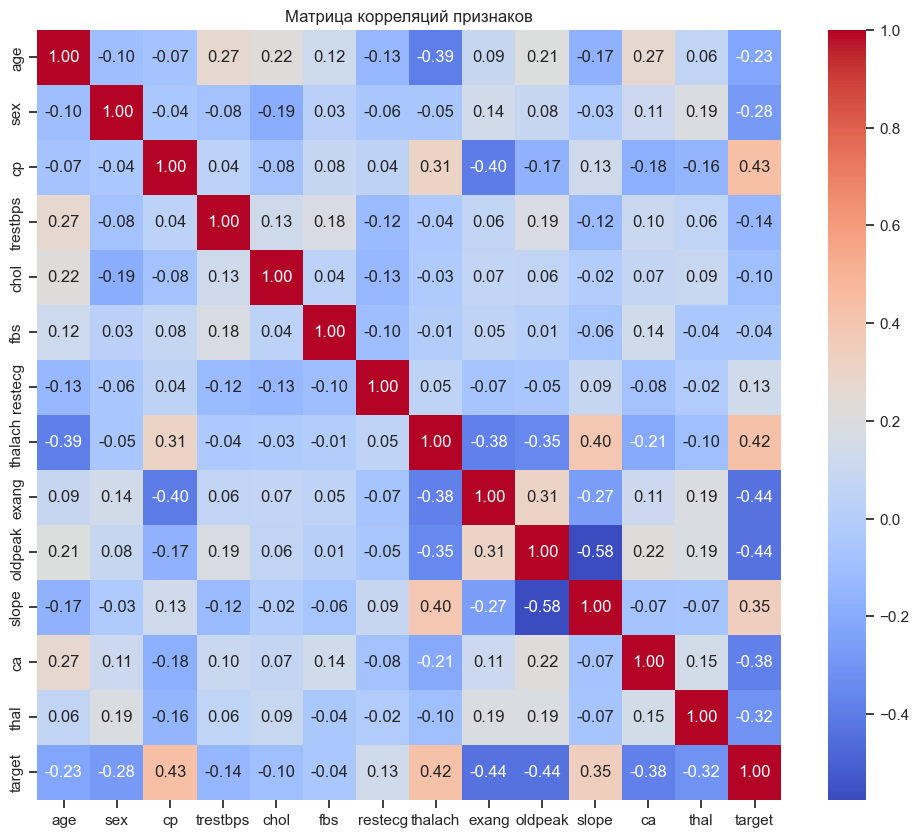

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляций признаков')
plt.show()